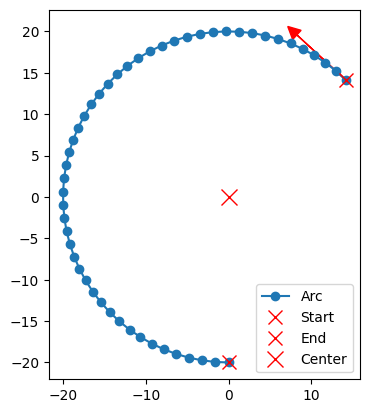

In [7]:
import ezdxf
import numpy as np
import math
import matplotlib.pyplot as plt

def extract_arc_points(dxf_file, num_points=50):
    doc = ezdxf.readfile(dxf_file)
    msp = doc.modelspace()
    arcs_data = []

    for arc in msp.query("ARC"):
        center = arc.dxf.center
        radius = arc.dxf.radius
        start_angle = math.radians(arc.dxf.start_angle)
        end_angle = math.radians(arc.dxf.end_angle)

        # 采样点
        angles = np.linspace(start_angle, end_angle, num_points)
        points = [(center.x + radius*math.cos(theta),
                   center.y + radius*math.sin(theta)) for theta in angles]

        # 起点和终点
        start_point = points[0]
        end_point = points[-1]

        arcs_data.append({
            "center": (center.x, center.y),
            "radius": radius,
            "points": points,
            "start_point": start_point,
            "end_point": end_point
        })

    return arcs_data


def visualize_arcs(arcs_data):
    fig, ax = plt.subplots()
    for arc in arcs_data:
        xs, ys = zip(*arc["points"])
        ax.plot(xs, ys, 'o-', label="Arc")

    # 起点标记：红色圆点
    ax.plot(arc["start_point"][0], arc["start_point"][1],
            'rx', markersize=10, label="Start")

    # 终点标记：绿色方块
    ax.plot(arc["end_point"][0], arc["end_point"][1],
            'rx', markersize=10, label="End")

    # 方向箭头（起点到第二个点）
    next_x, next_y = arc["points"][1]
    dx, dy = next_x - arc["start_point"][0], next_y - arc["start_point"][1]
    ax.arrow(arc["start_point"][0], arc["start_point"][1], dx*5, dy*5,
                head_width=1.5, head_length=1.5, fc='red', ec='red')
    
    # 圆心标记：蓝色十字 
    cx, cy = arc["center"]
    ax.plot(cx, cy, 'rx', markersize=12, label="Center")

    ax.set_aspect('equal')
    ax.legend()
    plt.show()


# 示例调用
arcs = extract_arc_points("arc.dxf", num_points=50)
visualize_arcs(arcs)